### INTRODUCTION

FIFA is a series of association football video games developed and released annually by Electronic Arts under the EA Sports label. Here we will be dealing with the data from FIFA 19 having all the details of available football players such as Age, Nationality,
Our task was to make an efficient team with high potential and low release clause (cost effective). Chosen Formation: 4-3-3



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\dell\Desktop\python\kai analytics 2\Top 10 projects\FIFA\fifa_eda.csv")

In [3]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [4]:
data.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


In [5]:
data['Club'].unique()
data['Club'].value_counts()

FC Barcelona                 33
Valencia CF                  33
Fortuna Düsseldorf           33
Cardiff City                 33
Rayo Vallecano               33
                             ..
América FC (Minas Gerais)    20
Fluminense                   20
Sligo Rovers                 19
Limerick FC                  19
Derry City                   18
Name: Club, Length: 651, dtype: int64

In [6]:
data['Nationality'].unique()
data['Nationality'].value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

In [7]:
data.shape

(18207, 18)

### DATA CLEANING

In [8]:
data.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [9]:
data['Club'] = data['Club'].fillna('Club not provided')
data.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [10]:
data['Value'].fillna(0, inplace=True)
data['International Reputation'].fillna(0, inplace=True)
data['Skill Moves'].fillna(0, inplace=True)
data['Contract Valid Until'].fillna(0, inplace=True)
data.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

###  FINDING OUTLIERS

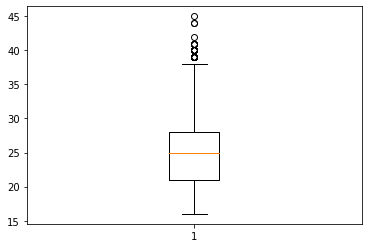

In [11]:
plt.boxplot(data['Age'])
plt.show()

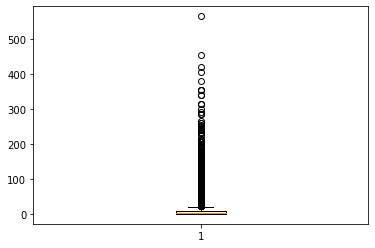

In [12]:
plt.boxplot(data['Wage'])
plt.show()

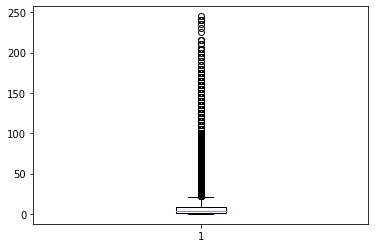

In [13]:
data = data[(data['Wage']< 250)]
plt.boxplot(data['Wage'])
plt.show()

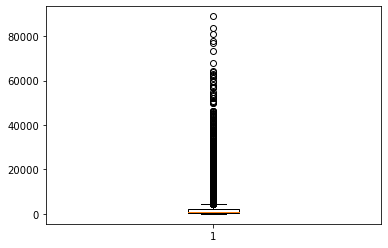

In [14]:
plt.boxplot(data['Value'])
plt.show()

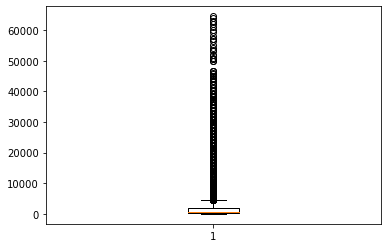

In [15]:
data = data[(data['Value']< 65000)]
plt.boxplot(data['Value'])
plt.show()

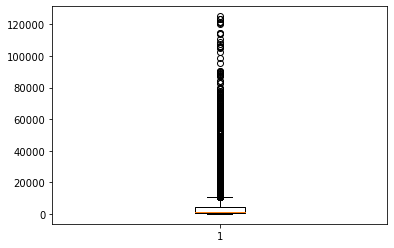

In [16]:
plt.boxplot(data['Release Clause'])
plt.show()

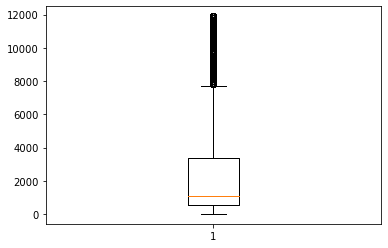

In [17]:
data = data[(data['Release Clause']< 12000)]
plt.boxplot(data['Release Clause'])
plt.show()

In [18]:
data['Position'].unique()
data['Position'].value_counts()

ST     1981
GK     1919
CB     1676
LB     1290
CM     1278
RB     1213
RM      997
LM      970
CDM     873
CAM     839
RCB     576
LCB     575
LW      341
LCM     333
RW      328
RCM     326
LDM     215
RDM     211
LS      173
RS      168
RWB      77
LWB      71
CF       64
RAM      18
LAM      18
RF       13
LF       10
Name: Position, dtype: int64

In [19]:
data.shape

(16553, 18)

Text(0.5, 1.0, '10 Most Common Nationalities')

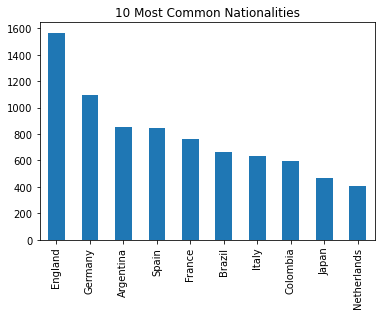

In [20]:
national = data['Nationality'].value_counts()[:10]
national.plot.bar()
plt.title("10 Most Common Nationalities")

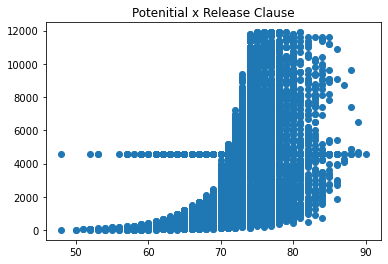

In [21]:
plt.scatter(data['Potential'], data['Release Clause'])
plt.title('Potenitial x Release Clause')
plt.show()

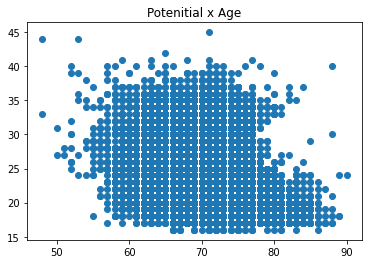

In [22]:
plt.scatter(data['Potential'], data['Age'])
plt.title('Potenitial x Age')
plt.show()

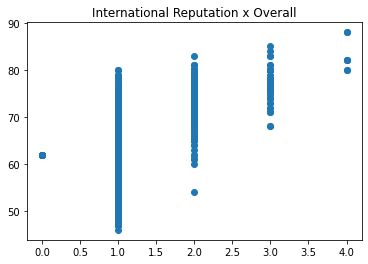

In [23]:
plt.scatter(data['International Reputation'], data['Overall'])
plt.title('International Reputation x Overall')
plt.show()

In [24]:
data1 = data.copy()

## 4-3-3 Formation

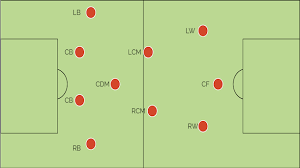

In [25]:
from IPython.display import Image
Image(filename='1.png')

###  Choosing players based on Age, Overall, Potential and Skill Moves for above positions

In [26]:
data1=data1.drop(["Height","Weight","Wage","Value","Joined","Contract Valid Until","Release Clause","International Reputation"],axis=1)

In [27]:
data1.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
38,167664,G. Higuaín,30,Argentina,88,88,Milan,Right,3.0,LS
41,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,Right,1.0,GK
91,187961,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,Right,3.0,LDM
152,137186,A. Barzagli,37,Italy,84,84,Juventus,Right,2.0,CB
166,212523,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,Left,4.0,CAM


In [28]:
data1.describe()

,ID,Age,Overall,Potential,Skill Moves
count,16553.000000,16553.000000,16553.000000,16553.000000,16553.000000
mean,215328.676192,25.051894,65.034012,70.306470,2.287622
std,30268.754663,4.769407,5.933709,5.374194,0.715584
min,16.000000,16.000000,46.000000,48.000000,0.000000
25%,201847.000000,21.000000,61.000000,67.000000,2.000000
50%,223488.000000,25.000000,65.000000,70.000000,2.000000
75%,237543.000000,28.000000,69.000000,74.000000,3.000000
max,246620.000000,45.000000,88.000000,90.000000,5.000000


In [29]:
data1=data1[(data1['Age'] >= 18) & (data1['Age'] <= 35)]

In [30]:
data1.describe()

,ID,Age,Overall,Potential,Skill Moves
count,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,216341.817320,25.001004,65.169689,70.273863,2.297584
std,26847.319238,4.420405,5.797259,5.313239,0.712053
min,657.000000,18.000000,47.000000,48.000000,0.000000
25%,202221.500000,21.000000,62.000000,67.000000,2.000000
50%,223330.000000,25.000000,66.000000,70.000000,2.000000
75%,237100.000000,28.000000,69.000000,74.000000,3.000000
max,246617.000000,35.000000,88.000000,90.000000,5.000000


In [31]:
data1 = data1[(data['Overall']>=60) & data['Overall']<=95]
data1 = data1[(data['Potential']>=60) & data['Potential']<=95]
data1 = data1[(data['Skill Moves']>=2) & data['Skill Moves']<=4]
data1.describe()

C:\Users\dell\AppData\Local\Temp\ipykernel_10060\74966862.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data1[(data['Overall']>=60) & data['Overall']<=95]
C:\Users\dell\AppData\Local\Temp\ipykernel_10060\74966862.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data1[(data['Potential']>=60) & data['Potential']<=95]
C:\Users\dell\AppData\Local\Temp\ipykernel_10060\74966862.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data1[(data['Skill Moves']>=2) & data['Skill Moves']<=4]


,ID,Age,Overall,Potential,Skill Moves
count,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,216341.817320,25.001004,65.169689,70.273863,2.297584
std,26847.319238,4.420405,5.797259,5.313239,0.712053
min,657.000000,18.000000,47.000000,48.000000,0.000000
25%,202221.500000,21.000000,62.000000,67.000000,2.000000
50%,223330.000000,25.000000,66.000000,70.000000,2.000000
75%,237100.000000,28.000000,69.000000,74.000000,3.000000
max,246617.000000,35.000000,88.000000,90.000000,5.000000


In [32]:
data1.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
38,167664,G. Higuaín,30,Argentina,88,88,Milan,Right,3.0,LS
91,187961,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,Right,3.0,LDM
166,212523,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,Left,4.0,CAM
176,207410,M. Kovačić,24,Croatia,83,89,Chelsea,Right,4.0,LCM
224,24630,Pepe Reina,35,Spain,83,83,Milan,Right,1.0,GK
314,146530,Dani Alves,35,Brazil,82,82,Paris Saint-Germain,Right,4.0,RB
332,216409,M. Politano,24,Italy,81,84,Inter,Left,4.0,RM
354,203890,S. Vrsaljko,26,Croatia,81,84,Inter,Right,3.0,RB
357,202685,S. Zaza,27,Italy,81,82,Torino,Left,4.0,RS
392,173771,L. Piszczek,33,Poland,81,81,Borussia Dortmund,Right,2.0,RB


In [33]:
data1 = data1.sort_values(by=['Potential'], ascending=False)
data1.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
166,212523,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,Left,4.0,CAM
6102,242816,Riqui Puig,18,Spain,69,89,FC Barcelona,Right,3.0,CM
176,207410,M. Kovačić,24,Croatia,83,89,Chelsea,Right,4.0,LCM
7414,241096,S. Tonali,18,Italy,68,89,Brescia,Right,3.0,CDM
38,167664,G. Higuaín,30,Argentina,88,88,Milan,Right,3.0,LS
6032,239981,J. Arp,18,Germany,69,88,Hamburger SV,Right,3.0,ST
562,230938,F. Kessié,21,Ivory Coast,79,88,Milan,Right,3.0,CM
1544,243952,A. Lunin,19,Ukraine,76,88,CD Leganés,Right,1.0,GK
569,228941,André Silva,22,Portugal,79,87,Sevilla FC,Right,4.0,ST
7952,237383,A. Bastoni,19,Italy,67,87,Parma,Left,2.0,CB


### CENTRE FORWARD OR STRIKER

In [34]:
dataST = data1[(data1['Position'] == 'ST') | (data1['Position'] == 'CF')]
dataST.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
6032,239981,J. Arp,18,Germany,69,88,Hamburger SV,Right,3.0,ST
569,228941,André Silva,22,Portugal,79,87,Sevilla FC,Right,4.0,ST
1296,234045,H. Onyekuru,21,Nigeria,76,86,Galatasaray SK,Right,4.0,ST
8145,240753,A. Gouiri,18,France,67,86,Olympique Lyonnais,Right,3.0,ST
7405,242374,M. Barrow,19,Gambia,68,85,Atalanta,Right,3.0,ST
4986,227903,M. Romero,19,Argentina,70,85,PSV,Right,3.0,ST
5170,240243,Matheus Cunha,19,Brazil,70,85,RB Leipzig,Right,3.0,ST
7322,243630,J. David,18,Canada,68,85,KAA Gent,Right,3.0,ST
2468,231352,T. Abraham,20,England,74,85,Aston Villa,Right,3.0,ST
460,204529,M. Batshuayi,24,Belgium,80,84,Valencia CF,Right,4.0,ST


###  GOALKEEPER

In [35]:
dataGK = data1[(data1['Position'] =='GK')]

dataGK.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
1544,243952,A. Lunin,19,Ukraine,76,88,CD Leganés,Right,1.0,GK
9935,235266,C. Früchtl,18,Germany,65,86,FC Bayern München,Left,1.0,GK
2742,228413,E. Audero,21,Italy,73,85,Sampdoria,Right,1.0,GK
8592,230872,M. Svilar,18,Belgium,67,84,SL Benfica,Right,1.0,GK
9187,236378,A. Plizzari,18,Italy,66,84,Milan,Right,1.0,GK
224,24630,Pepe Reina,35,Spain,83,83,Milan,Right,1.0,GK
5929,234833,F. Müller,20,Germany,69,83,1. FSV Mainz 05,Left,1.0,GK
3981,216325,A. Gunn,22,England,71,83,Southampton,Right,1.0,GK
3489,233306,D. Henderson,21,England,72,83,Sheffield United,Right,1.0,GK
620,203775,L. Karius,25,Germany,79,83,Beşiktaş JK,Right,1.0,GK


### MIDFIELDER

In [36]:
dataMD = data1[(data1['Position'] == 'CDM') | (data1['Position'] == 'LCM') | (data1['Position'] == 'RCM')]
dataMD.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
176,207410,M. Kovačić,24,Croatia,83,89,Chelsea,Right,4.0,LCM
7414,241096,S. Tonali,18,Italy,68,89,Brescia,Right,3.0,CDM
1791,233064,M. Mount,19,England,75,86,Derby County,Right,3.0,LCM
427,226226,G. Lo Celso,22,Argentina,80,86,Real Betis,Left,3.0,RCM
2830,231521,E. Palacios,19,Argentina,73,85,River Plate,Right,4.0,LCM
434,219809,T. Bakayoko,23,France,80,85,Milan,Right,3.0,LCM
4590,236496,M. Guendouzi,19,France,71,84,Arsenal,Right,3.0,CDM
3339,232999,T. Adams,19,United States,72,84,New York Red Bulls,Right,3.0,RCM
8079,237407,C. Durkin,18,United States,67,84,DC United,Right,2.0,CDM
1262,223273,M. Pašalić,23,Croatia,76,83,Atalanta,Right,4.0,RCM


## WINGPLAYERS

In [37]:
dataW = data1[(data1['Position']=='LW') | (data1['Position']=='RW')]
dataW.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
6559,231410,Brahim Díaz,18,Spain,69,86,Manchester City,Right,4.0,LW
1975,204233,C. Musonda,21,Belgium,75,85,Vitesse,Right,4.0,RW
4849,231448,R. Nelson,18,England,70,85,TSG 1899 Hoffenheim,Right,4.0,RW
10087,233510,T. Chong,18,Netherlands,65,85,Manchester United,Left,4.0,RW
4903,236836,O. Okwonkwo,20,Nigeria,70,85,Bologna,Right,3.0,LW
5407,241852,M. Diaby,18,France,70,85,Paris Saint-Germain,Left,3.0,RW
2797,233556,R. Orsolini,21,Italy,73,85,Bologna,Left,4.0,RW
11298,232519,G. Middleton,18,Scotland,64,84,Rangers FC,Left,3.0,LW
5816,236593,C. Stengs,19,Netherlands,69,84,AZ Alkmaar,Left,4.0,RW
2898,239482,Galeno,20,Brazil,73,84,Rio Ave FC,Right,4.0,LW


### Backfour

In [38]:
dataBF = data1[(data1['Position']== 'CB') | (data1['Position']== 'LB') | (data1['Position']== 'RB') ]
dataBF.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Skill Moves,Position
7952,237383,A. Bastoni,19,Italy,67,87,Parma,Left,2.0,CB
730,235212,A. Hakimi,19,Morocco,78,86,Borussia Dortmund,Right,3.0,LB
8624,237024,G. Itter,19,Germany,67,85,VfL Wolfsburg,Left,3.0,LB
899,236295,Aarón Martín,21,Spain,77,85,1. FSV Mainz 05,Left,3.0,LB
7525,240099,K. Rüegg,19,Switzerland,68,85,FC Zürich,Right,2.0,RB
1150,232656,T. Hernández,20,France,77,85,Real Sociedad,Left,3.0,LB
5080,235863,M. Varnier,20,Italy,70,85,Atalanta,Right,2.0,CB
5754,239136,N. Cozza,19,France,69,85,Montpellier HSC,Left,2.0,CB
11319,243275,L. Mai,18,Germany,64,84,FC Bayern München,Right,2.0,CB
4094,231207,J. Lucumi,20,Colombia,71,84,KRC Genk,Left,2.0,CB


In [39]:
data2 = data.copy()
data2.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
38,167664,G. Higuaín,30,Argentina,88,88,Milan,57000.0,245.0,Right,4.0,3.0,LS,2016,2019-06-30,6.083333,196.0,4585.060806
41,1179,G. Buffon,40,Italy,88,88,Paris Saint-Germain,4000.0,77.0,Right,4.0,1.0,GK,2018,2019-01-01,6.333333,203.0,7400.000000
91,187961,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,37000.0,235.0,Right,3.0,3.0,LDM,2016,2019-06-30,6.000000,157.0,4585.060806
152,137186,A. Barzagli,37,Italy,84,84,Juventus,4200.0,95.0,Right,3.0,2.0,CB,2011,2019-01-01,6.166667,192.0,6900.000000
166,212523,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,36500.0,18.0,Left,2.0,4.0,CAM,2016,2018-12-31,6.250000,176.0,4585.060806


In [40]:
# Choosing players based on Low Release Clause
data2=data2.drop(["Height","Weight","International Reputation","Overall","Potential","Skill Moves","Height","Weight"],axis=1)
data2.head()

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause
38,167664,G. Higuaín,30,Argentina,Milan,57000.0,245.0,Right,LS,2016,2019-06-30,4585.060806
41,1179,G. Buffon,40,Italy,Paris Saint-Germain,4000.0,77.0,Right,GK,2018,2019-01-01,7400.000000
91,187961,Paulinho,29,Brazil,Guangzhou Evergrande Taobao FC,37000.0,235.0,Right,LDM,2016,2019-06-30,4585.060806
152,137186,A. Barzagli,37,Italy,Juventus,4200.0,95.0,Right,CB,2011,2019-01-01,6900.000000
166,212523,Anderson Talisca,24,Brazil,Guangzhou Evergrande Taobao FC,36500.0,18.0,Left,CAM,2016,2018-12-31,4585.060806


In [41]:
data2.describe()

,ID,Age,Value,Wage,Joined,Release Clause
count,16553.000000,16553.000000,16553.000000,16553.000000,16553.000000,16553.000000
mean,215328.676192,25.051894,1188.367063,5.818341,2016.471214,2209.056971
std,30268.754663,4.769407,1722.341526,8.964617,1.970857,2446.857915
min,16.000000,16.000000,0.000000,0.000000,1991.000000,13.000000
25%,201847.000000,21.000000,280.000000,1.000000,2016.000000,525.000000
50%,223488.000000,25.000000,600.000000,3.000000,2017.000000,1100.000000
75%,237543.000000,28.000000,1200.000000,6.000000,2018.000000,3400.000000
max,246620.000000,45.000000,57000.000000,245.000000,2018.000000,11900.000000


In [42]:
data2 = data2[(data2['Release Clause']>=500.00) & (data2['Release Clause']<=5000.00)] 
data2.head(10)

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause
38,167664,G. Higuaín,30,Argentina,Milan,57000.0,245.0,Right,LS,2016,2019-06-30,4585.060806
91,187961,Paulinho,29,Brazil,Guangzhou Evergrande Taobao FC,37000.0,235.0,Right,LDM,2016,2019-06-30,4585.060806
166,212523,Anderson Talisca,24,Brazil,Guangzhou Evergrande Taobao FC,36500.0,18.0,Left,CAM,2016,2018-12-31,4585.060806
176,207410,M. Kovačić,24,Croatia,Chelsea,35000.0,165.0,Right,LCM,2016,2019-06-30,4585.060806
318,5479,Casillas,37,Spain,FC Porto,1500.0,10.0,Left,GK,2015,2019-01-01,3000.000000
332,216409,M. Politano,24,Italy,Inter,22500.0,57.0,Left,RM,2016,2019-06-30,4585.060806
354,203890,S. Vrsaljko,26,Croatia,Inter,18000.0,57.0,Right,RB,2016,2019-06-30,4585.060806
357,202685,S. Zaza,27,Italy,Torino,21000.0,48.0,Left,RS,2016,2019-06-30,4585.060806
427,226226,G. Lo Celso,22,Argentina,Real Betis,20000.0,72.0,Left,RCM,2016,2019-06-30,4585.060806
434,219809,T. Bakayoko,23,France,Milan,17000.0,85.0,Right,LCM,2016,2019-06-30,4585.060806


### GOALKEEPER

In [43]:
dataGK2 = data2[(data2['Position']== 'GK')]
dataGK2.head(5)

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause
318,5479,Casillas,37,Spain,FC Porto,1500.0,10.0,Left,GK,2015,2019-01-01,3000.000000
504,188943,K. Trapp,27,Germany,Eintracht Frankfurt,11500.0,61.0,Right,GK,2016,2019-06-30,4585.060806
544,146748,Diego López,36,Spain,RCD Espanyol,2000.0,17.0,Right,GK,2017,2020-01-01,4200.000000
554,49031,S. Sorrentino,39,Italy,Chievo Verona,1000.0,10.0,Right,GK,2016,2022-01-01,1700.000000
568,229909,A. Lunev,26,Russia,Club not provided,0.0,0.0,Right,GK,2016,0,4585.060806


### Merging dataframes to find best Goalkeeper based on potential and release clause

In [44]:
intersectGK = dataGK2.merge(dataGK, how='inner', on=['Name'])
intersectGK=intersectGK.drop(["Age_y","Nationality_y","Club_y","Preferred Foot_y","Position_y"],axis=1)
intersectGK=intersectGK.drop(["ID_x", "ID_y"],axis=1)
intersectGK=intersectGK.sort_values(by="Potential",ascending=False)
intersectGK = intersectGK.rename({'Age_x':'Age', 'Nationality_x':'Nationality', 'Club_x':'Club', 'Preferred Foot_x':'Preferred Foot','Position_x':'Position'}, axis=1)
intersectGK.head(5)
3

,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause,Overall,Potential,Skill Moves
12,A. Lunin,19,Ukraine,CD Leganés,10500.0,24.0,Right,GK,2016,2019-06-30,4585.060806,76,88,1.0
609,C. Früchtl,18,Germany,FC Bayern München,1000.0,3.0,Left,GK,2017,2020-01-01,2700.000000,65,86,1.0
41,E. Audero,21,Italy,Sampdoria,5500.0,30.0,Right,GK,2016,2019-06-30,4585.060806,73,85,1.0
542,A. Plizzari,18,Italy,Milan,1100.0,4.0,Right,GK,2016,2019-01-01,2500.000000,66,84,1.0
505,M. Svilar,18,Belgium,SL Benfica,1300.0,1.0,Right,GK,2017,2022-01-01,3400.000000,67,84,1.0


### STRIKER OR CENTRE FORWARD

In [45]:
dataST2 = data2[(data2['Position']== 'ST') | (data2['Position']== 'CF') ]
dataST2=dataST2.drop(["ID"],axis=1)
dataST2.head(5)


,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause
460,M. Batshuayi,24,Belgium,Valencia CF,19500.0,105.0,Right,ST,2016,2019-06-30,4585.060806
569,André Silva,22,Portugal,Sevilla FC,19000.0,84.0,Right,ST,2016,2019-06-30,4585.060806
874,A. Dzyuba,29,Russia,Club not provided,0.0,0.0,Right,ST,2016,0,4585.060806
928,G. Bou,28,Argentina,Racing Club,9000.0,26.0,Right,ST,2016,2019-06-30,4585.060806
948,J. Martínez,31,Colombia,Portimonense SC,8000.0,22.0,Right,ST,2016,2019-06-30,4585.060806


### Merging dataframes to find best Striker based on potential and release clause 

In [46]:
intersectST = dataST2.merge(dataST, how='inner', on=['Name'])
intersectST=intersectST.drop(["Age_y","Nationality_y","Club_y","Preferred Foot_y","Position_y"],axis=1)
intersectST=intersectST.sort_values(by="Potential",ascending=False)
intersectST = intersectST.rename({'Age_x':'Age', 'Nationality_x':'Nationality', 'Club_x':'Club', 'Preferred Foot_x':'Preferred Foot','Position_x':'Position'}, axis=1)
intersectST.head(5)

,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause,ID,Overall,Potential,Skill Moves
289,J. Arp,18,Germany,Hamburger SV,2200.0,4.0,Right,ST,2017,2020-01-01,4900.000000,239981,69,88,3.0
1,André Silva,22,Portugal,Sevilla FC,19000.0,84.0,Right,ST,2016,2019-06-30,4585.060806,228941,79,87,4.0
11,H. Onyekuru,21,Nigeria,Galatasaray SK,12500.0,56.0,Right,ST,2016,2019-06-30,4585.060806,234045,76,86,4.0
554,A. Gouiri,18,France,Olympique Lyonnais,1600.0,10.0,Right,ST,2017,2021-01-01,4000.000000,240753,67,86,3.0
442,J. David,18,Canada,KAA Gent,1900.0,5.0,Right,ST,2017,2022-01-01,4000.000000,243630,68,85,3.0


### BACKFOUR

In [47]:
dataBF2=data2[ (data2["Position"]=="LB") | (data2["Position"]=="RB") | (data2["Position"]=="CB")]
dataBF2.head(5)

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause
354,203890,S. Vrsaljko,26,Croatia,Inter,18000.0,57.0,Right,RB,2016,2019-06-30,4585.060806
549,139997,D. Srna,36,Croatia,Cagliari,1700.0,27.0,Right,RB,2018,2019-01-01,2900.000000
617,204311,K. Zouma,23,France,Everton,14000.0,80.0,Right,CB,2016,2019-06-30,4585.060806
677,187347,I. Smolnikov,29,Russia,Club not provided,0.0,0.0,Right,RB,2016,0,4585.060806
730,235212,A. Hakimi,19,Morocco,Borussia Dortmund,12500.0,49.0,Right,LB,2016,2020-06-30,4585.060806


### Merging dataframes to find best Back Players based on potential and release clause 

In [48]:
intersectBF  = dataBF2.merge(dataBF, how='inner', on=['Name'])
intersectBF =intersectBF.drop(["Age_y","Nationality_y","Club_y","Preferred Foot_y","Position_y"],axis=1)
intersectBF =intersectBF.drop(["ID_x", "ID_y"],axis=1)
intersectBF =intersectBF.sort_values(by="Potential",ascending=False)
intersectBF = intersectBF.rename({'Age_x':'Age', 'Nationality_x':'Nationality', 'Club_x':'Club', 'Preferred Foot_x':'Preferred Foot','Position_x':'Position'}, axis=1)
intersectBF.head(10)

,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause,Overall,Potential,Skill Moves
1118,A. Bastoni,19,Italy,Parma,1500.0,7.0,Left,CB,2016,2019-06-30,4585.060806,67,87,2.0
3,A. Hakimi,19,Morocco,Borussia Dortmund,12500.0,49.0,Right,LB,2016,2020-06-30,4585.060806,78,86,3.0
17,T. Hernández,20,France,Real Sociedad,11000.0,76.0,Left,LB,2016,2019-06-30,4585.060806,77,85,3.0
1273,G. Itter,19,Germany,VfL Wolfsburg,1500.0,5.0,Left,LB,2015,2021-01-01,3400.000000,67,85,3.0
5,Aarón Martín,21,Spain,1. FSV Mainz 05,11000.0,18.0,Left,LB,2016,2019-06-30,4585.060806,77,85,3.0
418,M. Varnier,20,Italy,Atalanta,3500.0,2.0,Right,CB,2016,2019-06-30,4585.060806,70,85,2.0
1011,K. Rüegg,19,Switzerland,FC Zürich,1700.0,3.0,Right,RB,2017,2020-01-01,3600.000000,68,85,2.0
0,S. Vrsaljko,26,Croatia,Inter,18000.0,57.0,Right,RB,2016,2019-06-30,4585.060806,81,84,3.0
1929,L. Mai,18,Germany,FC Bayern München,850.0,5.0,Right,CB,2018,2021-01-01,2300.000000,64,84,2.0
35,T. Fosu-Mensah,20,Netherlands,Fulham,8000.0,53.0,Right,RB,2016,2019-06-30,4585.060806,74,84,3.0


### MIDFIELDERS

In [49]:
dataMD2=data2[ (data2["Position"]=="CDM") | (data2["Position"]=="LCM") | (data2["Position"]=="RCM")]
dataMD2.head(5)

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause
176,207410,M. Kovačić,24,Croatia,Chelsea,35000.0,165.0,Right,LCM,2016,2019-06-30,4585.060806
427,226226,G. Lo Celso,22,Argentina,Real Betis,20000.0,72.0,Left,RCM,2016,2019-06-30,4585.060806
434,219809,T. Bakayoko,23,France,Milan,17000.0,85.0,Right,LCM,2016,2019-06-30,4585.060806
865,193198,N. Gudelj,26,Serbia,Sporting CP,10500.0,19.0,Right,CDM,2016,2019-06-30,4585.060806
996,193361,R. Soriano,27,Italy,Torino,9500.0,31.0,Right,RCM,2016,2019-06-30,4585.060806


### Merging dataframes to find best Midfielders based on potential and release clause

In [50]:
intersectMD  = dataMD2.merge(dataMD, how='inner', on=['Name'])
intersectMD =intersectMD.drop(["Age_y","Nationality_y","Club_y","Preferred Foot_y","Position_y"],axis=1)
intersectMD =intersectMD.drop(["ID_x", "ID_y"],axis=1)
intersectMD =intersectMD.sort_values(by="Potential",ascending=False)
intersectMD = intersectMD.rename({'Age_x':'Age', 'Nationality_x':'Nationality', 'Club_x':'Club', 'Preferred Foot_x':'Preferred Foot','Position_x':'Position'}, axis=1)
intersectMD.head(5)

,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause,Overall,Potential,Skill Moves
0,M. Kovačić,24,Croatia,Chelsea,35000.0,165.0,Right,LCM,2016,2019-06-30,4585.060806,83,89,4.0
403,S. Tonali,18,Italy,Brescia,1800.0,1.0,Right,CDM,2017,2021-01-01,4700.000000,68,89,3.0
16,M. Mount,19,England,Derby County,11000.0,37.0,Right,LCM,2016,2019-06-30,4585.060806,75,86,3.0
1,G. Lo Celso,22,Argentina,Real Betis,20000.0,72.0,Left,RCM,2016,2019-06-30,4585.060806,80,86,3.0
2,T. Bakayoko,23,France,Milan,17000.0,85.0,Right,LCM,2016,2019-06-30,4585.060806,80,85,3.0


### WINGPLAYERS

In [51]:
dataW2=data2[ (data2["Position"]=="RW") | (data2["Position"]=="LW")]
dataW2.head(5)

,ID,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause
1209,221701,Gabriel Boschilia,22,Brazil,FC Nantes,10500.0,48.0,Left,RW,2016,2019-06-30,4585.060806
1269,204077,M. Niang,23,Senegal,Stade Rennais FC,10500.0,37.0,Right,LW,2016,2019-06-30,4585.060806
1352,182879,B. Dzsudzsák,31,Hungary,Club not provided,0.0,0.0,Left,RW,2016,0,4585.060806
1520,229593,M. Pjaca,23,Croatia,Fiorentina,11000.0,75.0,Right,LW,2016,2019-06-30,4585.060806
1627,183068,C. Beauvue,30,France,Stade Malherbe Caen,6500.0,23.0,Right,RW,2016,2019-06-30,4585.060806


### # Merging dataframes to find best Wing players based on potential and release clause

In [52]:
intersectW  = dataW2.merge(dataW, how='inner', on=['Name'])
intersectW =intersectW.drop(["Age_y","Nationality_y","Club_y","Preferred Foot_y","Position_y"],axis=1)
intersectW =intersectW.drop(["ID_x", "ID_y"],axis=1)
intersectW =intersectW.sort_values(by="Potential",ascending=False)
intersectW = intersectW.rename({'Age_x':'Age', 'Nationality_x':'Nationality', 'Club_x':'Club', 'Preferred Foot_x':'Preferred Foot','Position_x':'Position'}, axis=1)
intersectW.head(10)

,Name,Age,Nationality,Club,Value,Wage,Preferred Foot,Position,Joined,Contract Valid Until,Release Clause,Overall,Potential,Skill Moves
15,R. Orsolini,21,Italy,Bologna,7000.0,52.0,Left,RW,2016,2019-06-30,4585.060806,73,85,4.0
55,R. Nelson,18,England,TSG 1899 Hoffenheim,3700.0,25.0,Right,RW,2016,2019-06-30,4585.060806,70,85,4.0
7,C. Musonda,21,Belgium,Vitesse,11000.0,64.0,Right,RW,2016,2019-06-30,4585.060806,75,85,4.0
277,T. Chong,18,Netherlands,Manchester United,1100.0,13.0,Left,RW,2017,2019-01-01,3200.000000,65,85,4.0
12,M. Ødegaard,19,Norway,Vitesse,9000.0,54.0,Left,RW,2016,2019-06-30,4585.060806,74,84,5.0
23,H. Wilson,21,Wales,Derby County,5500.0,48.0,Left,RW,2016,2019-06-30,4585.060806,72,84,3.0
326,G. Middleton,18,Scotland,Rangers FC,925.0,6.0,Left,LW,2018,2023-01-01,2600.000000,64,84,3.0
85,C. Stengs,19,Netherlands,AZ Alkmaar,2300.0,4.0,Left,RW,2016,2022-01-01,4800.000000,69,84,4.0
16,Galeno,20,Brazil,Rio Ave FC,7000.0,9.0,Right,LW,2016,2019-06-30,4585.060806,73,84,4.0
227,D. Jastrzembski,18,Germany,Hertha BSC,1300.0,4.0,Left,LW,2018,2020-01-01,3100.000000,66,84,3.0


## CONCLUSION

## THE END